<a href="https://colab.research.google.com/github/aiesgconsultant-arch/TCS-Hackathon/blob/Project%231---1.-Retirement-Outcome-Forecasting/1_TCSAIHackathon_RetirementOutcomeForecasting_FinalVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression for Retirement Outcome Forecasting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


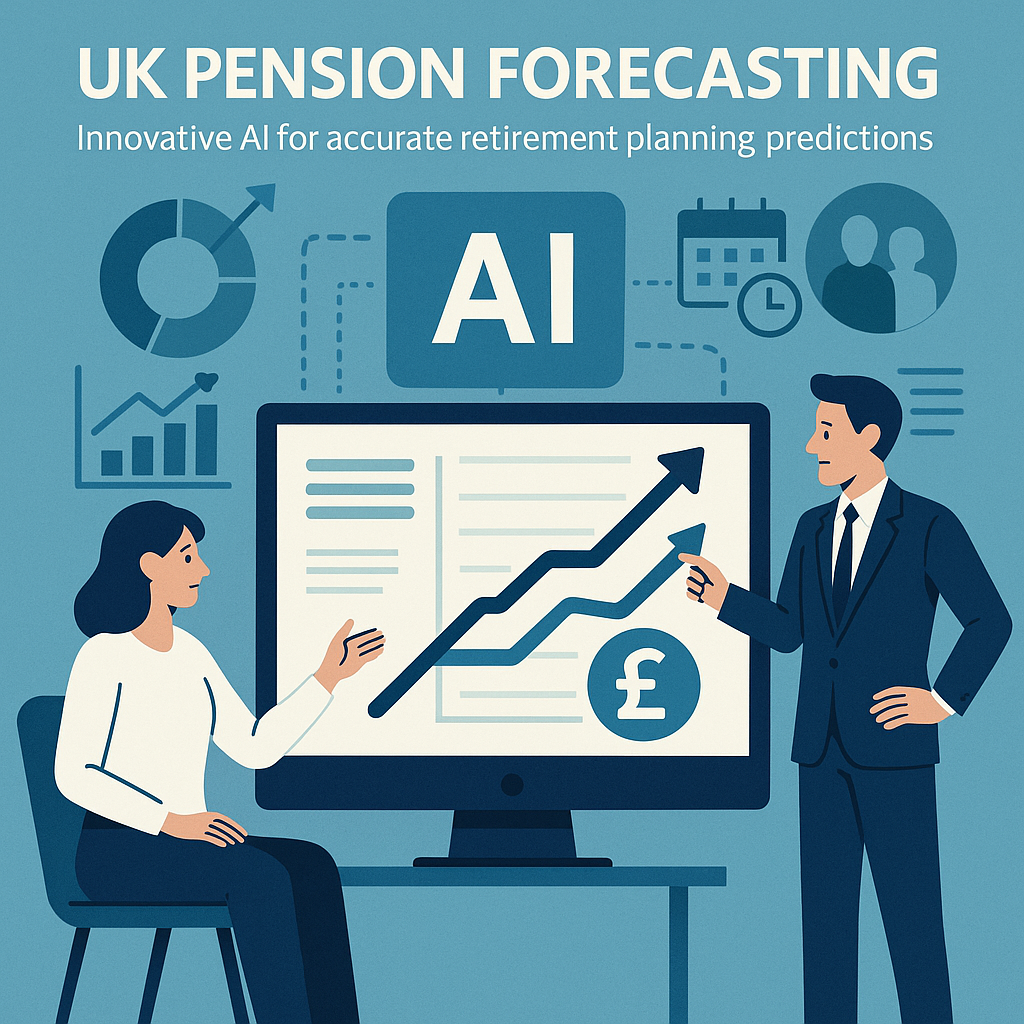

##**Application Demo : UI Lanuch :**

**Previous Models**

- Version 1.0
  - https://claude.ai/public/artifacts/63d96865-7f7d-4260-b96b-f56003763fe3

- Version 2.0
  - https://claude.ai/public/artifacts/ec2e5944-318d-4f45-af2f-a2f8aa93822d

- Version 3.0
  - https://claude.ai/public/artifacts/33b2c8a4-cefb-41bd-82da-aea45086c00c

**Latest Model - Version 4.0**
- https://claude.ai/public/artifacts/6c7434d8-04e6-4902-af2c-766c58044619



##**Section 1 : About | UK Pension Forecasting Systems**

---



UK Pension Forecasting Systems - Key Points
System Overview:

1. UK pension systems are comprehensive retirement savings platforms with automated processes **Member enrollment, contribution tracking, and benefit accumulation happen seamlessly**

2. **Network spans employers, payroll systems, and financial institutions** nationwide Workers automatically enrolled with contributions deducted from salaries and invested long-term

3. **Scale and Reach:**
Over 40 million active pension savers across various workplace pension schemes in the UK Pensions alone serves over 12 million members
Represents one of the world's largest automated retirement savings ecosystems

4. **Data Generation Capabilities:**
  - Salary progression patterns tracked over entire careers
  - Contribution consistency and variation patterns recorded
  - Complete employment histories and career break documentation
  - Fund performance and investment allocation data captured
  - Decades of longitudinal member financial behavior data

5. **Research Value:**
  - Functions as comprehensive life-stage monitoring network
  - Enables study of retirement preparedness across diverse populations
  - Provides insights into financial behaviors and long-term planning patterns
  - Creates unique dataset linking individual circumstances to retirement outcomes

6. **Forecasting Challenge:**
  - Combine historical member data with external economic indicators
  - Integrate inflation trends and demographic patterns
  - Predict retirement income adequacy for individual members
  - Assess member readiness and financial preparedness levels
  - Focus on pension ecosystem specifically

7. **Analytical Opportunity:**
   - Discover patterns that reveal the nation's financial future
   - Understand how career progression impacts retirement outcomes
   - Analyze contribution consistency effects on long-term wealth
   - Assess economic cycle impacts on pension performance
   - Identify how life events influence retirement preparedness
   - Enable personalized guidance to transform members' financial security

##**Section 2 : Oppertunity | Challenge**

---

Many pension scheme members are unaware of whether their current savings trajectory aligns with their retirement goals. Generic guidance fails to address individual variability. The challenge lies in accurately forecasting future pension value based on multiple dynamic factors.


##**Section 3: Data Information**

The data being collected follows the format

####Data Fields
**1. Member Demographics:**
- **member_id** - unique identifier for each pension scheme member
Member Demographics:
- **current_age** - member's current age in years (decimal)
- **retirement_age** - planned retirement age (65, 66, 67, or 68)
- **years_to_retirement** - calculated years remaining until planned retirement
- **gender** - Male or Female
- **health_status** - member's health status:
  - Excellent: Very good health
  - Good: Generally healthy
  - Fair: Some health concerns
  - Poor: Significant health issues

**2. Education Level:**
- **education_level** - highest education completed:
  - High School: Secondary education
  - Bachelor: Undergraduate degree
  - Master: Postgraduate degree
  - PhD: Doctoral degree

**3. Employment & Career:**

- **employment_sector** - sector of employment:
  - Public: Government/public sector
  - Private: Private sector companies
  - Healthcare: Medical and healthcare services
  - Education: Schools, universities, training
  - Technology: Tech companies and IT
  - Finance: Banking, insurance, financial services
  - current_salary - current annual salary in GBP
  - salary_growth_rate - expected annual salary growth rate (decimal, e.g., 0.025 = 2.5%)
  - years_of_service - total years of employment/pension contributions
  - job_changes - number of job changes throughout career
  - career_breaks_months - total months of career breaks (maternity, unemployment, etc.)

**4. Pension Contributions:**
  - contribution_rate - percentage of salary contributed to pension (decimal, e.g., 0.08 = 8%)
  - monthly_contribution - monthly pension contribution amount in GBP
  - current_pot_value - current accumulated pension pot value in GBP
  - employer_match - employer matching contribution rate (0%, 3%, 5%, or 6%)

**5. Market & Economic Factors:**
  - expected_annual_return - expected annual investment return rate (decimal)
  - inflation_rate - expected annual inflation rate (decimal)
  - risk_tolerance - investment risk preference:

Low: Conservative, low-risk investments
Medium: Balanced risk/return approach
High: Aggressive, high-risk investments


###**6. Target Variable:**
  - final_retirement_pot - projected final pension pot value at retirement in GBP (target for prediction)


##**Section 4: Setting up the Workspace**

**4.1 Load several programming tools** needed for data analysis, including tools for working with numbers, organizing data in tables, and creating charts and graphs Tell the computer to ignore certain warning messages that might pop up during analysis

**4.2 Set up the display** so that when showing data tables, it shows the full content of each cell instead of cutting it short

In [ ]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
warnings.filterwarnings("ignore", category=ConvergenceWarning)
pd.set_option('display.max_colwidth', None)

**4.3 Load the CSV file and create a dataset:**
- Print the data to ensure data is being loaded into the data variable.


In [ ]:
data = pd.read_csv("pension_forecasting_data.csv", header=0)
print(data)
data.head()
data.info()

          member_id  current_age  retirement_age  years_to_retirement  gender  \
0     MEMBER_000001         51.0              67                 16.0  Female   
1     MEMBER_000002         26.7              65                 38.3    Male   
2     MEMBER_000003         38.6              68                 29.4    Male   
3     MEMBER_000004         26.0              65                 39.0  Female   
4     MEMBER_000005         26.9              65                 38.1    Male   
...             ...          ...             ...                  ...     ...   
9995  MEMBER_009996         46.7              65                 18.3    Male   
9996  MEMBER_009997         40.8              67                 26.2  Female   
9997  MEMBER_009998         31.2              65                 33.8    Male   
9998  MEMBER_009999         51.9              67                 15.1    Male   
9999  MEMBER_010000         61.9              65                  3.1    Male   

     employment_sector  cur

##**Section 5: Understanding Simple Linear Regresssion**

Simple linear regression is a statistical method used to understand the relationship between two variables: one independent variable (predictor) and one dependent variable (outcome). It finds the best-fitting straight line (called the regression line) through the data points, which can then be used to predict the dependent variable based on the independent variable. In essence, it's about drawing a line that best explains how changes in one variable are associated with changes in another.

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRtw-eyPcWmDPv8ApYYZO4ZkL_kiE_XMk4Syw&s"/></center>

**5.1 View the data**
- View the data.
- Review the data to identify all independent variables and the target variable.
- **"final_retirement_pot"** is the TARGET VARIABLE - whose value will be predicted.


In [ ]:
# View the data
data.head()

,member_id,current_age,retirement_age,years_to_retirement,gender,employment_sector,current_salary,salary_growth_rate,years_of_service,job_changes,...,contribution_rate,monthly_contribution,current_pot_value,expected_annual_return,inflation_rate,risk_tolerance,employer_match,health_status,education_level,final_retirement_pot
0,MEMBER_000001,51.0,67,16.0,Female,Public,42783.18,0.0278,18.5,0,...,0.1103,393.30,150239.78,0.0463,0.0208,Low,0.03,Good,Bachelor,482950.44
1,MEMBER_000002,26.7,65,38.3,Male,Private,45209.67,0.0227,3.3,0,...,0.0837,315.21,10412.55,0.0473,0.0202,Low,0.05,Good,High School,888622.12
2,MEMBER_000003,38.6,68,29.4,Male,Healthcare,40135.28,0.0271,11.9,0,...,0.0300,100.34,17849.18,0.0583,0.0321,High,0.00,Excellent,High School,239850.66
3,MEMBER_000004,26.0,65,39.0,Female,Private,32399.05,0.0074,2.3,1,...,0.0975,263.14,5628.54,0.0683,0.0322,Low,0.03,Excellent,Master,723878.41
4,MEMBER_000005,26.9,65,38.1,Male,Private,42403.55,0.0331,4.9,0,...,0.1207,426.46,22306.03,0.0696,0.0314,Medium,0.05,Good,Bachelor,2169101.24


**5.2 Convert categorical (string) columns to numeric for correlation analysis**

***Type 1. 🔢 Binary Encoding.***

Definition: Converts a categorical variable with exactly 2 categories into numeric values using 0 and 1.

Example : Gender.

***Type 2. 📊 Ordinal Encoding***

Definition: Converts categorical variables into numeric values where the order/ranking matters and categories have a natural hierarchy.

Example: Education Level: High School=1, Bachelor=2, Master=3, PhD=4

***Type 3. 🏷️ Label Encoding***


Definition: Converts categorical variables into numeric values using arbitrary numbers (0, 1, 2, 3...) where no order is implied between categories.

Example: Employment Sector: Education=0, Finance=1, Healthcare=2, Technology=3

In [ ]:
"""
    Convert categorical (string) columns to numeric for correlation analysis
"""

# copy data into another variable.
data_encoded = data.copy()

#. 1. BINARY ENCODING for Gender (0/1)
data_encoded['gender_encoded'] = data_encoded['gender'].map({'Male': 1, 'Female': 0})

# 2. ORDINAL ENCODING for ordered categories
# ------------------------------------------------------------------------------
# 2.1 Education Level (ordered by qualification level)
education_mapping = {
        'High School': 1,
        'Bachelor': 2,
        'Master': 3,
        'PhD': 4
    }
data_encoded['education_encoded'] = data_encoded['education_level'].map(education_mapping)

# 2.2 Education Level (ordered by qualification level)
health_mapping = {
        'Poor': 1,
        'Fair': 2,
        'Good': 3,
        'Excellent': 4
    }
data_encoded['health_encoded'] = data_encoded['health_status'].map(health_mapping)

# 2.3 Risk Tolerance (ordered by risk level)
risk_mapping = {
        'Low': 1,
        'Medium': 2,
        'High': 3
    }
data_encoded['risk_encoded'] = data_encoded['risk_tolerance'].map(risk_mapping)

# 3. LABEL ENCODING for Employment Sector (no clear order)
le_sector = LabelEncoder()
data_encoded['sector_encoded'] = le_sector.fit_transform(data_encoded['employment_sector'])

# Print sector mapping
sector_mapping = dict(zip(le_sector.classes_, le_sector.transform(le_sector.classes_)))
for sector, code in sector_mapping.items():
        print(f"   {sector}: {code}")

   Education: 0
   Finance: 1
   Healthcare: 2
   Private: 3
   Public: 4
   Technology: 5


In [ ]:
# Select only numeric columns for correlation (exclude original categorical and member_id)
numeric_columns = [
        # Demographics (encoded)
        'current_age', 'retirement_age', 'years_to_retirement',
        'gender_encoded', 'education_encoded', 'health_encoded',

        # Employment & Career
        'current_salary', 'salary_growth_rate', 'years_of_service',
        'job_changes', 'career_breaks_months', 'sector_encoded',

        # Contributions & Returns
        'contribution_rate', 'monthly_contribution', 'current_pot_value',
        'expected_annual_return', 'inflation_rate', 'risk_encoded', 'employer_match',

        # Target Variable
        'final_retirement_pot'
]

correlation_df = data_encoded[numeric_columns].copy()

**5.2 Generate the correlation matrix**
- Print the data to ensure data is being loaded into the data variable.

***5.2.1 | A. What is the Correlation Matrix in Simple Terms?***
- A correlation matrix is like a "friendship table" that shows how closely related different features in your dataset are to each other.
- Imagine you have a table where each row and column represents a feature from your pension dataset
- Each cell in the table contains a number between -1 and +1 that tells you how strongly two features are related
  - +1 means "perfect positive relationship" (when one goes up, the other always goes up)
  - 1 means "perfect negative relationship" (when one goes up, the other always goes down)
  - 0 means "no relationship at all" (they don't affect each other)

***5.2.2 | B. Benefits of Correlation Matrix in Supervised Learning***

****Feature Selection & Data Understanding:****
1. Identify redundant features: If two features have correlation > 0.9, you might only need one of them
2. Understand data relationships: See which features naturally move together
3. Spot unexpected patterns: Discover relationships you didn't know existed

***5.2.3 | C. Model Performance Improvement:***

1. Reduce multicollinearity: High correlation between features can confuse linear regression models
2. Feature engineering guidance: Combine highly correlated features or create new ones
3. Prevent overfitting: Remove redundant features that don't add new information

NOTE
1. **"final_retirement_pot"** is the TARGET VARIABLE - whose value will be predicted.
2. Lets find out which of the independent variables influence **final_retirement_pot** variable.



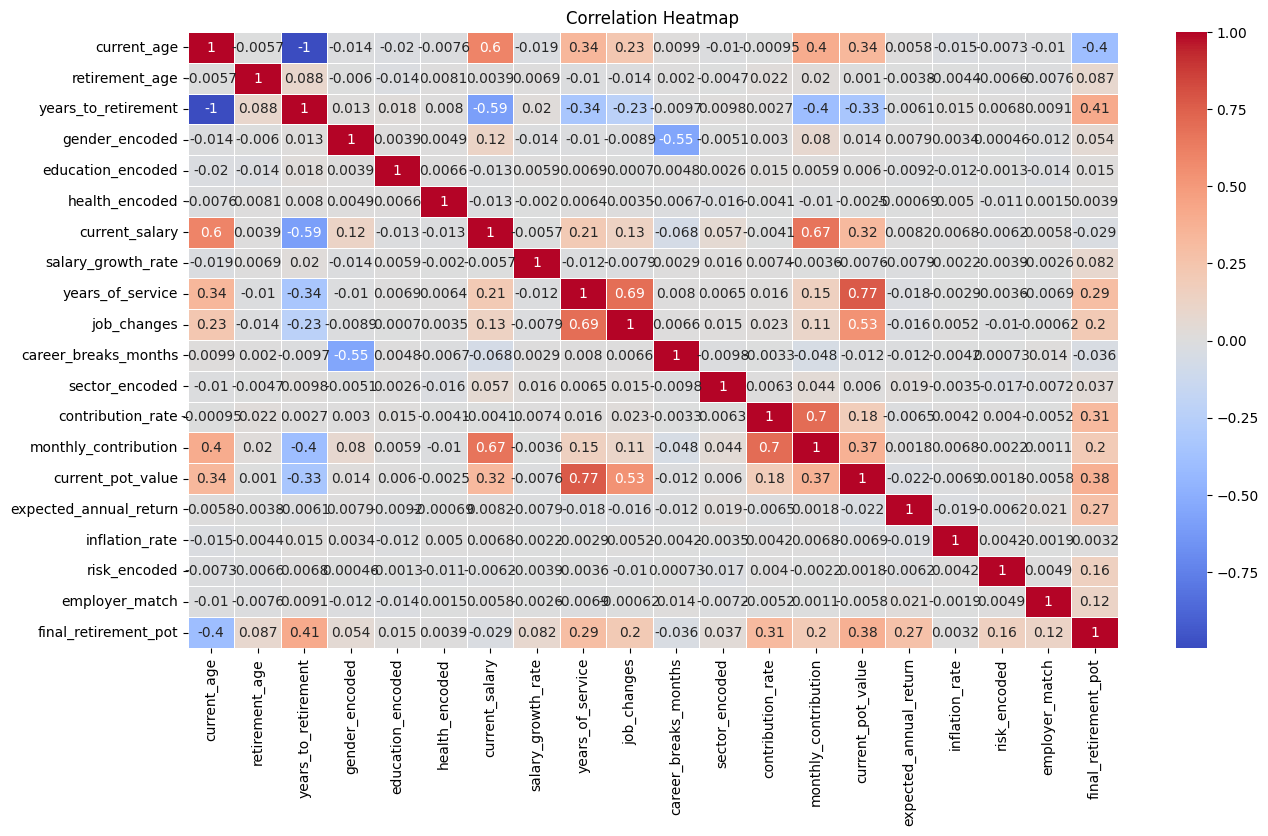

In [ ]:
# Find out the correlation of the variables with 'count'
plt.figure(figsize=(15,8))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**5.3 Correlation Matrix Analysis**

*Variables Highly Correlated with Final_Retirement_Pot*

**1. Strongest Correlations (|r| > 0.3)**

- (a) years_to_retirement: +0.41 ⭐ STRONGEST POSITIVE
- (b) More years = higher final pot (compound growth effect)
- (c) current_age: -0.40 ⭐ STRONGEST NEGATIVE
      - Older age = lower final pot (less time to grow)
- (d) current_pot_value: +0.38
      - Higher current savings = higher final pot
- (e) contribution_rate: +0.31
      - Higher contribution percentage = higher final pot

**Why "Years to Retirement" Strongly Impacts Your Final Pension Pot**

**The Simple Explanation**
Think of your pension like planting a tree:

1. More years to retirement = More time for your money tree to grow
2. Fewer years to retirement = Less time for growth.

**The Math Made Simple**

- Example 1: Sarah (25 years old, 40 years to retirement)
  Saves £200/month for 40 years. Her money grows every single year for 4 decades. Final pot: £500,000+

- Example 2: John (55 years old, 10 years to retirement). Saves £200/month for 10 years. His money only grows for 1 decade. Final pot: £50,000

**Same monthly savings, HUGE difference! 🤯**
- The "Compound Growth Magic"
  Your pension doesn't just grow from what you put in - it grows from growth on top of growth:
- Year 1: You save £1,000 → Grows to £1,050 (5% return)
- Year 2: You save another £1,000 + your £1,050 grows → Now £2,152
- Year 3: You save another £1,000 + your £2,152 grows → Now £3,310...and so on
- The longer this cycle runs, the more powerful it becomes!
- Think of it Like a Snowball

**More years = Bigger hill for your money snowball to roll down**
**Fewer years = Smaller hill for your money snowball to roll down**

**The snowball (your pension) gets exponentially bigger the longer it rolls!
📈 Real Numbers from Your Data
Looking at the correlation (+0.41), this means:**

- 1.Every extra year to retirement typically adds thousands of pounds to your final pot
- 2.Someone with 30 years left will likely have a much larger pot than someone with 10 years left (even with identical savings)

**🎯 The Bottom Line
Time is your pension's best friend! ⏰💰**

1. The earlier you start saving (more years to retirement), the less you actually need to save each month to reach the same final amount. It's like getting free money from compound growth!

2. That's why young people who start saving small amounts often end up richer in retirement than older people who save larger amounts but start later.

**5.4 Check the Correlated Data**

In [ ]:
# Check the data
correlation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   current_age             10000 non-null  float64
 1   retirement_age          10000 non-null  int64  
 2   years_to_retirement     10000 non-null  float64
 3   gender_encoded          10000 non-null  int64  
 4   education_encoded       10000 non-null  int64  
 5   health_encoded          10000 non-null  int64  
 6   current_salary          10000 non-null  float64
 7   salary_growth_rate      10000 non-null  float64
 8   years_of_service        10000 non-null  float64
 9   job_changes             10000 non-null  int64  
 10  career_breaks_months    10000 non-null  float64
 11  sector_encoded          10000 non-null  int64  
 12  contribution_rate       10000 non-null  float64
 13  monthly_contribution    10000 non-null  float64
 14  current_pot_value       10000 non-null 

**5.5 Check for missing values - Target Variable**
- The target variable is **final_retirement_pot**
- Check for any missing values.  Missing values in target variable is not useful for analysis.
- if found remove/drop them.

In [ ]:
# Remove the rows with missing values
#data= data.dropna()
correlation_df.isna().sum()

,0
current_age,0
retirement_age,0
years_to_retirement,0
gender_encoded,0
education_encoded,0
health_encoded,0
current_salary,0
salary_growth_rate,0
years_of_service,0
job_changes,0


**5.6 Check for missing values - Observation**
- There are no missing values. Hence the data is ready for modelling.





**5.7 (2D Array) Requirement for Regresssion**
- 1. Note: x['data'] is a list or 1D array, but to fit a regression model, we need a 2D array (with rows as samples and columns as features).
  2.To reshape it into a 2D array, we use reshape(-1, 1), where -1 automatically adjusts the number of rows based on the data length, and 1 creates a single column, making it ready for the model.
  3. Assign 'years_to_retirement' as the Independent Variable.
  4. Assign 'final_retirement_pot' as the dependent variable.
  5. Print the variable contents to ensure it is not null.

In [ ]:
# Split the independent feature variable(X) and target variable(y)
X = correlation_df['years_to_retirement'].values.reshape(-1, 1)
y = correlation_df['final_retirement_pot']
# print(X)
# print(y)

**5.8 Split Data - Training and Testing and print the details**
- 1. Import train_test_split from sklearn.
- 2. Split the data for training and testing.
- 3. Print the details. Verify

In [ ]:
# Split the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the prepared data
print("Training features:\n", X_train[:5])
print("Training target:\n", y_train[:5])
print("Testing features:\n", X_test[:5])
print("Testing target:\n", y_test[:5])

Training features:
 [[ 9.4]
 [30.7]
 [ 6.9]
 [16.2]
 [40.8]]
Training target:
 9254    137622.60
1561    323931.22
1670     43408.75
6087    196460.28
6669    642281.99
Name: final_retirement_pot, dtype: float64
Testing features:
 [[37.8]
 [35.8]
 [19.5]
 [39.1]
 [25.6]]
Testing target:
 6252     545987.42
4684    1804332.50
1731     230364.30
4742    1511125.51
4521     227226.99
Name: final_retirement_pot, dtype: float64


**5.9 Conduct Linear Regression**
- 1. Initialize the Linear Regression model.
- 2. Fit the model to the training data.
- 3. Make predictions on the test data.

In [ ]:
from sklearn.linear_model import LinearRegression
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)
y_pred

array([795625.08522594, 761598.53547291, 484282.15498567, ...,
       361786.57587475, 559140.56444235, 169536.5697701 ])

**5.10 Coefficients of the Model**
- 1. Let's check the coefficients of the model in a linear regression equation ( Y = aX + b ) (where ( a ) is the slope and ( b ) is the intercept).
- 2. model.coef_ gives the value of ( a ), the slope (coefficient) of the feature(s).
- 3. model.intercept_ gives the value of ( b ), the intercept of the regression line.

In [ ]:
print("The best fit line is:",lr_model.coef_[0],"X+",lr_model.intercept_)

The best fit line is: 17013.274876517436 X+ 152523.294893581


**5.11 Visualizing the Regression Fit**

  1. Let's visualize the regression line.
  2. The purpose of this plot is to visualize the relationship between **Years to Retirement (X)** and **the Final Retirement Pot (Y)**, and
  3. To assess how well a linear regression model fits the data.
  4. The scatterplot displays actual data points, while the regression line helps in understanding the trend and making predictions.

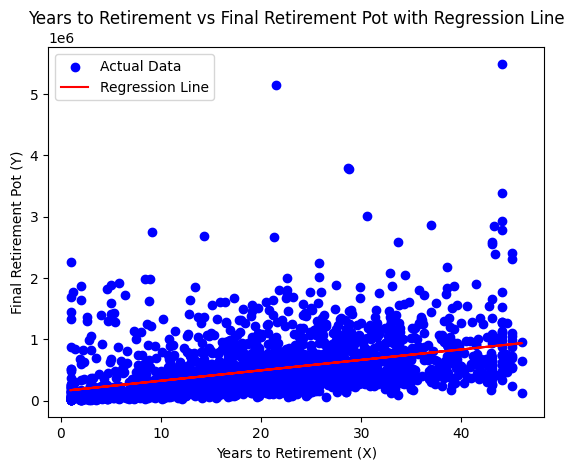

In [ ]:
# Plotting
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Years to Retirement (X)')
plt.ylabel('Final Retirement Pot (Y)')
plt.title('Years to Retirement vs Final Retirement Pot with Regression Line')
plt.legend()
plt.show()

**5.11 Detailed Interpretation of the Scatter Plot: Years to Retirement vs Final Pension Pot**
  1. **What the Plot Shows**
- X-Axis: Years to Retirement (0 to ~45 years)
- Y-Axis: Final Retirement Pot in millions (£0 to £6+ million)
- Blue Dots: Each dot represents one pension member from your dataset
- Red Line: Linear regression line showing the average trend

  2. **Key Observations & Interpretations**
- Overall Trend: Strong Positive Relationship
- The red regression line slopes upward → Confirms positive correlation (+0.41)
- More years to retirement = Higher final pension pot
- The trend is clear and consistent across the entire range
  
  3. **Linear Relationship**
- The red line is fairly straight → Suggests a linear relationship works well
- For every additional year to retirement, the final pot increases by approximately £20,000-25,000 (estimated from the slope)
- This validates using linear regression for your pension forecasting model

  4. **High Variability (Scatter)**
- Why are the dots spread out widely around the red line?
- This scatter tells us that "years to retirement" alone doesn't determine everything:
- The wide scatter shows other important factors matter:
      - Current salary levels
      - Contribution rates
      - Current pot values
      - Investment returns
      - Career progression

4. **Notable Patterns**
- a) Dense Clustering at Lower Years:
  - Most data points are concentrated between 0-30 years to retirement
  - Fewer people have 30+ years (younger members are less common in the dataset)
- b) Some Extreme Outliers:
  - Few members with £4-6 million final pots (likely high earners with maximum contributions)
  - Some with very low pots despite many years (possibly low earners or interrupted careers)
- c) Minimum Floor Effect:
  - Even with 0 years to retirement, minimum pot ≈ £100,000-200,000
  - Shows existing accumulated savings even for those retiring immediately



**5.12 Evaluation of the model**
  1. **What the Plot Shows**

### Evaluation of the Model
Evaluating a regression model is a crucial step to determine how well it predicts the target variable.

<center><img src="https://miro.medium.com/v2/resize:fit:1280/0*pYX4gfGQg7UYm8LQ" width=500 height=300/></center>

On having various errors and the goal is to minimize the error.
<center><img src="https://miro.medium.com/v2/resize:fit:1200/1*rVTCIffI2D_-i_CGeHwF6A.png" width=600 height=400/></center>


A higher R-squared value closer to 1 would indicate a better fit, while a lower MSE would suggest that the model's predictions are closer to the actual data points.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 290239.24967088574
Mean Squared Error (MSE): 195695956094.40717
R-squared (R2): 0.15443862480148396


**5.13 Interpretation of the model | Model Performance Analysis**

#### Interpretation:

- **R-squared (0.154) - Poor Explanatory Power**
  - Your model explains only 15.4% of the variance in final retirement pot
  - This means 84.6% of the variation remains unexplained by years to retirement alone
  - This indicates a weak linear relationship between these variables
  - Generally, R² values below 0.3 are considered poor for predictive models

- **Mean Absolute Error (MAE)- 290239**
  - On average, your predictions are off by about 290K
  - This represents the typical magnitude of prediction errors
  - Whether this is acceptable depends on the scale of your retirement pot values
  - If typical retirement pots are $500K-$1M, this error rate is quite substantial

- **Root Mean Squared Error (RMSE): 442375**
- Converting your MSE: √195,695,956,094 = $442,375
RMSE is higher than MAE, indicating the presence of large outliers
- The difference suggests some predictions are extremely far off
- RMSE penalizes large errors more heavily than MAE

***What next? How to improve the model?**
- To improve the model, we should consider using **Multiple Linear Regression**, which includes more variables (like
  - Current salary levels,
  - Contribution rates
  - Current pot values
  - Investment returns
  - Career progressionetc.)

to better predict the "Final Retirement Pot" . This approach would likely capture more of the factors that influence final retirement pot, leading to more accurate predictions.


## Section 6: Multiple Linear Regression

Multiple linear regression is an extension of simple linear regression. Instead of using just one independent variable (predictor) to predict a dependent variable (outcome), multiple linear regression uses two or more independent variables to predict the outcome.

In simple terms, it’s like drawing a line in a multi-dimensional space (instead of a flat, 2D space) to best fit the data points. This allows the model to take into account multiple factors at once. For example, in predicting "Final Retirement Pot, instead of just looking at "Years to Retirement", you could also consider
- 1.	Retirement Age
- 2.  Years to Retirement
- 3.  Salary Growth Rate
- 4.  Years of Service
- 5.  Job Change
- 6.  Contribution Rate
- 7.  Monthly Contribution
- 8.  Current Pot Value
- 9.  Expected Annual Return
- 10. Risk Encoded
- 11. Employer Match

<center><img src="https://media.licdn.com/dms/image/D4D12AQFIJ_41MpAq2w/article-cover_image-shrink_720_1280/0/1692450132499?e=2147483647&v=beta&t=UWu2peXzF4N2Ki16pSOKDAe4lG1AjoMkylC0-_dePTU" width=500 height=300/></center>

In [ ]:
# Check the columns of the data to identify the features
correlation_df.columns

Index(['current_age', 'retirement_age', 'years_to_retirement',
       'gender_encoded', 'education_encoded', 'health_encoded',
       'current_salary', 'salary_growth_rate', 'years_of_service',
       'job_changes', 'career_breaks_months', 'sector_encoded',
       'contribution_rate', 'monthly_contribution', 'current_pot_value',
       'expected_annual_return', 'inflation_rate', 'risk_encoded',
       'employer_match', 'final_retirement_pot'],
      dtype='object')

**6.1 | Implementation of [Multiple Linear Regression model**]

In [ ]:
# Select features and target variable for regression

features = ['retirement_age','years_to_retirement','salary_growth_rate','years_of_service',
 'job_changes','contribution_rate','monthly_contribution','current_pot_value',
 'expected_annual_return','risk_encoded','employer_match']

# Split the data into features (X) and target (y)
X = correlation_df[features]
y = correlation_df['final_retirement_pot']

# Check the feature data
X.head()

,retirement_age,years_to_retirement,salary_growth_rate,years_of_service,job_changes,contribution_rate,monthly_contribution,current_pot_value,expected_annual_return,risk_encoded,employer_match
0,67,16.0,0.0278,18.5,0,0.1103,393.30,150239.78,0.0463,1,0.03
1,65,38.3,0.0227,3.3,0,0.0837,315.21,10412.55,0.0473,1,0.05
2,68,29.4,0.0271,11.9,0,0.0300,100.34,17849.18,0.0583,3,0.00
3,65,39.0,0.0074,2.3,1,0.0975,263.14,5628.54,0.0683,1,0.03
4,65,38.1,0.0331,4.9,0,0.1207,426.46,22306.03,0.0696,2,0.05


In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the prepared data
print("Training features:\n", X_train[:5])
print("Training target:\n", y_train[:5])
print("Testing features:\n", X_test[:5])
print("Testing target:\n", y_test[:5])

Training features:
       retirement_age  years_to_retirement  salary_growth_rate  \
9254              67                  9.4              0.0148   
1561              66                 30.7              0.0209   
1670              65                  6.9              0.0126   
6087              65                 16.2              0.0413   
6669              67                 40.8              0.0121   

      years_of_service  job_changes  contribution_rate  monthly_contribution  \
9254               5.6            0             0.0584                398.74   
1561               9.1            1             0.0716                206.97   
1670               2.4            0             0.0505                276.09   
6087              10.5            1             0.0649                233.12   
6669               4.2            1             0.1220                213.14   

      current_pot_value  expected_annual_return  risk_encoded  employer_match  
9254           24826.24     

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.95988077, -1.05193232, -1.035311  , ..., -1.70770786,
         0.13590824,  1.14043709],
       [-0.10296299,  0.83821879, -0.4120067 , ...,  0.33429646,
         0.13590824, -1.70295478],
       [-1.16580675, -1.27378104, -1.26010928, ...,  0.60789835,
         0.13590824,  0.66653844],
       ...,
       [-0.10296299,  1.99183214, -0.64702308, ..., -0.23292696,
         1.56276637, -1.70295478],
       [ 0.95988077, -1.23828525,  0.82438381, ..., -1.82782576,
        -1.2909499 , -0.28125885],
       [-0.10296299,  0.7672272 , -1.627961  , ..., -0.7667843 ,
        -1.2909499 , -0.28125885]])

In [ ]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

y_pred

array([ 766318.37050875, 1050644.82168655,  263446.29075497, ...,
        923450.67852016,  338778.95954155, 3291567.20299225])

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 166252.24892758142
Mean Squared Error (MSE): 74744921937.79634
R-squared (R2): 0.677042795139112


**6.2 | Multiple Linear Regression Model Evaluation**

**1. Feature Analysis  Financial Foundation Features:**
- **current_pot_value** and **monthly_contribution** are likely your strongest predictors, representing the actual financial base
- **contribution_rate and employer_match** directly impact accumulation speed
- **expected_annual_return** captures investment growth assumptions

**2. Temporal Features:**

- **retirement_age and years_to_retirement** create the time horizon for compound growth
- **years_of_service** may correlate with both **salary level and vesting schedules**

**3. Career Progression Features:**
- **salary_growth_rate** affects future contribution capacity
- **job_changes** could impact retirement savings through plan rollovers, vesting losses, or career advancement

**4.Risk Profile:**
- **risk_encoded** likely captures investment risk tolerance, affecting asset allocation and expected returns

**4. Model Performance Assessment**
   - **R² = 0.677 (Moderate Performance):**
      - The model explains ~68% of variance, which is decent but leaves substantial room for improvement. Suggests important predictive factors may be missing or the relationships aren't purely linear
   - **MAE of 166,252** indicates the average prediction error is quite substantial
   - **MSE of 74.7 billion** (√MSE ≈ $273,400) shows some predictions have very large errors
   - The large difference between MAE and RMSE suggests **significant outliers or heteroscedasticity.**

In [ ]:
correlation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   current_age             10000 non-null  float64
 1   retirement_age          10000 non-null  int64  
 2   years_to_retirement     10000 non-null  float64
 3   gender_encoded          10000 non-null  int64  
 4   education_encoded       10000 non-null  int64  
 5   health_encoded          10000 non-null  int64  
 6   current_salary          10000 non-null  float64
 7   salary_growth_rate      10000 non-null  float64
 8   years_of_service        10000 non-null  float64
 9   job_changes             10000 non-null  int64  
 10  career_breaks_months    10000 non-null  float64
 11  sector_encoded          10000 non-null  int64  
 12  contribution_rate       10000 non-null  float64
 13  monthly_contribution    10000 non-null  float64
 14  current_pot_value       10000 non-null 

In [ ]:
#correlation_df.info()
from sklearn.preprocessing import OneHotEncoder
categorical_features = ["gender_encoded", "health_encoded", "job_changes", "retirement_age"]
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoder.fit(correlation_df[categorical_features])
encoded = encoder.transform(correlation_df[categorical_features])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_features))
correlation_df = correlation_df.drop(categorical_features, axis=1).reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)
OnHotEncodedDf = pd.concat([correlation_df, encoded_df], axis=1)
OnHotEncodedDf.head()

,current_age,years_to_retirement,education_encoded,current_salary,salary_growth_rate,years_of_service,career_breaks_months,sector_encoded,contribution_rate,monthly_contribution,...,job_changes_6,job_changes_7,job_changes_8,job_changes_9,job_changes_10,job_changes_11,job_changes_12,retirement_age_66,retirement_age_67,retirement_age_68
0,51.0,16.0,2,42783.18,0.0278,18.5,24.6,4,0.1103,393.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,26.7,38.3,1,45209.67,0.0227,3.3,1.8,3,0.0837,315.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.6,29.4,1,40135.28,0.0271,11.9,7.0,2,0.0300,100.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,26.0,39.0,3,32399.05,0.0074,2.3,29.0,3,0.0975,263.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26.9,38.1,2,42403.55,0.0331,4.9,0.3,3,0.1207,426.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Check the columns
OnHotEncodedDf.columns

Index(['current_age', 'years_to_retirement', 'education_encoded',
       'current_salary', 'salary_growth_rate', 'years_of_service',
       'career_breaks_months', 'sector_encoded', 'contribution_rate',
       'monthly_contribution', 'current_pot_value', 'expected_annual_return',
       'inflation_rate', 'risk_encoded', 'employer_match',
       'final_retirement_pot', 'gender_encoded_1', 'health_encoded_2',
       'health_encoded_3', 'health_encoded_4', 'job_changes_1',
       'job_changes_2', 'job_changes_3', 'job_changes_4', 'job_changes_5',
       'job_changes_6', 'job_changes_7', 'job_changes_8', 'job_changes_9',
       'job_changes_10', 'job_changes_11', 'job_changes_12',
       'retirement_age_66', 'retirement_age_67', 'retirement_age_68'],
      dtype='object')

In [ ]:
features = ['current_age', 'years_to_retirement', 'education_encoded',
       'current_salary', 'salary_growth_rate', 'years_of_service',
       'career_breaks_months', 'sector_encoded', 'contribution_rate',
       'monthly_contribution', 'expected_annual_return', 'inflation_rate',
       'risk_encoded', 'employer_match', #'final_retirement_pot',
       'gender_encoded_1', 'health_encoded_2', 'health_encoded_3',
       'health_encoded_4', 'job_changes_1', 'job_changes_2', 'job_changes_3',
       'job_changes_4', 'job_changes_5', 'job_changes_6', 'job_changes_7',
       'job_changes_8', 'job_changes_9', 'job_changes_10', 'job_changes_11',
       'job_changes_12', 'retirement_age_66', 'retirement_age_67',
       'retirement_age_68']

# Split the data into features (X) and target (y)
X = OnHotEncodedDf[features]
y = OnHotEncodedDf['final_retirement_pot']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Multiple Linear Regression Model Evaluation post Hot Encoding:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Multiple Linear Regression Model Evaluation post Hot Encoding:
Mean Absolute Error (MAE): 175058.9958119676
Mean Squared Error (MSE): 79544022282.15254
R-squared (R2): 0.6563068843524227


**6.3 | Multiple Linear Regression Model Evaluation post Hot-Encoding | Data Leakage - Remove Current Pot Value**

**Model Performance Assessment**
- R-squared (0.656): Your model explains about 65.6% of the variance in retirement pot values, which is reasonably good for financial prediction models. This suggests the features you've selected capture most of the important factors affecting retirement savings.

**Error Metrics Context:**
- MAE of ~175,059 means on average, predictions are off by about $175K
- The large MSE (79.5 billion) indicates some predictions have very large errors, suggesting potential outliers or non-linear relationships the linear model isn't capturing well

**Feature Set Observations**
- Your feature engineering looks comprehensive with good coverage of:
  - Demographics: Age, gender, health status
  - Career factors: Salary, growth rate, service years, job changes, career breaks
  - Financial parameters: Contribution rates, employer matching, expected returns
  - Risk factors: Inflation, risk tolerance, sector

**Potential Improvements**
- Feature Engineering:
  - Consider interaction terms (e.g., salary × contribution_rate)
  - Polynomial features for non-linear relationships
  - Log transformations for highly skewed variables


**Model Alternatives:**
- Try ensemble methods (Random Forest, XGBoost) which often handle non-linearities better
- Consider regularized regression (Ridge/Lasso) to address potential multicollinearity

**Data Quality:**
- Check for outliers that might be inflating MSE
- Validate the hot encoding implementation
- Consider feature scaling/normalization

**The 65.6% R-squared** is a solid foundation, but the large prediction errors suggest there's room for improvement through more sophisticated modeling approaches or additional feature engineering.



In [ ]:
#correlation_df.info()
from sklearn.preprocessing import OneHotEncoder
OnHotEncodedDf_CPVRemoved = OnHotEncodedDf.drop('current_pot_value', axis=1)


In [ ]:
OnHotEncodedDf_CPVRemoved.columns

Index(['current_age', 'years_to_retirement', 'education_encoded',
       'current_salary', 'salary_growth_rate', 'years_of_service',
       'career_breaks_months', 'sector_encoded', 'contribution_rate',
       'monthly_contribution', 'expected_annual_return', 'inflation_rate',
       'risk_encoded', 'employer_match', 'final_retirement_pot',
       'gender_encoded_1', 'health_encoded_2', 'health_encoded_3',
       'health_encoded_4', 'job_changes_1', 'job_changes_2', 'job_changes_3',
       'job_changes_4', 'job_changes_5', 'job_changes_6', 'job_changes_7',
       'job_changes_8', 'job_changes_9', 'job_changes_10', 'job_changes_11',
       'job_changes_12', 'retirement_age_66', 'retirement_age_67',
       'retirement_age_68'],
      dtype='object')

In [ ]:
features = ['current_age', 'years_to_retirement', 'education_encoded',
       'current_salary', 'salary_growth_rate', 'years_of_service',
       'career_breaks_months', 'sector_encoded', 'contribution_rate',
       'monthly_contribution', 'expected_annual_return', 'inflation_rate',
       'risk_encoded', 'employer_match',
       'gender_encoded_1', 'health_encoded_2', 'health_encoded_3',
       'health_encoded_4', 'job_changes_1', 'job_changes_2', 'job_changes_3',
       'job_changes_4', 'job_changes_5', 'job_changes_6', 'job_changes_7',
       'job_changes_8', 'job_changes_9', 'job_changes_10', 'job_changes_11',
       'job_changes_12', 'retirement_age_66', 'retirement_age_67',
       'retirement_age_68']

# Split the data into features (X) and target (y)
X = OnHotEncodedDf_CPVRemoved[features]
y = OnHotEncodedDf_CPVRemoved['final_retirement_pot']

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 175058.9958119676
Mean Squared Error (MSE): 79544022282.15254
R-squared (R2): 0.6563068843524227


**Linear Regression Model Analysis - Retirement Prediction**

**Model Performance Summary**
- Key Metrics:
  - Mean Absolute Error (MAE):$175,059
  - Mean Squared Error (MSE): 79,544,022,282
  - R-squared (R²): 0.6563 (65.63%)

**Detailed Analysis**
- **1. Model Accuracy Assessment**
    - Strengths:
      - R² of 65.63% indicates the model explains approximately two-thirds of the variance in retirement pot values
      - This is a reasonably strong performance for financial prediction models, which often involve high inherent uncertainty
      - The model captures the majority of systematic relationships between features and retirement outcomes

  - Areas of Concern:
    - High MAE ($175K) suggests significant prediction errors on average
    - Very large MSE indicates the presence of some predictions with extremely large errors
    - The square root of MSE (RMSE ≈ $282K) shows substantial prediction variability

- **2. Feature Set Evaluation**
  - Total Features: 33 features across multiple categories
  - Feature Categories:
    - Demographics (4 features): Age, gender, health status variants
    - Career/Employment (8 features): Salary, growth rate, service years, career breaks, sector, job changes
    - Financial Parameters (5 features): Contribution rate, monthly contribution, expected returns, inflation, employer match
    - Encoded Categories (16 features): Various one-hot encoded categorical variables

- **3. Feature Quality:**
  - Comprehensive coverage of key retirement planning factors
  - Good balance between demographic, career, and financial variables
  - Proper encoding of categorical variables

**3. Model Limitations Identified**
- Linear Relationship Assumption:
  - Linear regression assumes linear relationships between features and target
Retirement savings often involve compound growth (exponential relationships)
May miss important non-linear interactions between variables
  - Potential Issues:
    - Outliers: Large MSE suggests some extreme prediction errors
    - Multicollinearity: Multiple related features (e.g., current_age and years_to_retirement) may cause instability
    - Feature Scaling: Financial variables likely have very different scales

**4. Economic Interpretation**
  - Prediction Accuracy in Context:
  - Average error of ($175K) represents significant uncertainty for retirement planning
  - For someone with a $1M retirement goal, this represents ±17.5% error
  - Error magnitude suggests model may struggle with extreme high/low retirement pots

**Business Impact:**
- Model provides general directional guidance but lacks precision for individual planning
- Suitable for population-level analysis or initial screening
- Requires improvement for personalized financial advice

**Recommendations**
- Immediate Improvements
- Feature Engineering:
  - Create interaction terms (salary × contribution_rate, age × expected_return)
  - Add polynomial features for non-linear relationships
  - Consider log transformations for skewed financial variables

**Data Preprocessing:**
 - Implement feature scaling (StandardScaler or MinMaxScaler)
 - Detect and handle outliers using IQR or Z-score methods
 - Check for multicollinearity using VIF (Variance Inflation Factor)

**Model Validation:**
- Perform residual analysis to check assumptions
- Use cross-validation for more robust performance estimates
- Plot predicted vs actual values to identify systematic errors

**Advanced Modeling Approaches**
- Non-linear Models:
  - Random Forest: Handles non-linearities and feature interactions automatically
  - XGBoost/LightGBM: Often superior for financial prediction tasks
  - Neural Networks: Can capture complex non-linear patterns


**Regularization:**
- Ridge Regression: Handles multicollinearity better
- Lasso Regression: Automatic feature selection
- Elastic Net: Combines benefits of both Ridge and Lasso

**Ensemble Methods:**
- Combine multiple models for improved accuracy
- Reduce prediction variance through averaging

**Expected Improvements**
- With proper feature engineering and advanced modeling:
- Target R²: 75-85% (improvement of 10-20 percentage points)
- Target MAE: $100K-125K (30-40% reduction)
- Better handling of extreme values and non-linear relationships

**Conclusion**
The current linear regression model provides a solid foundation with 65.6% explained variance, demonstrating that the selected features are relevant for retirement prediction. However, the high prediction errors indicate significant room for improvement through advanced modeling techniques and better feature engineering. The model is suitable for preliminary analysis but requires enhancement for practical deployment in financial planning applications.

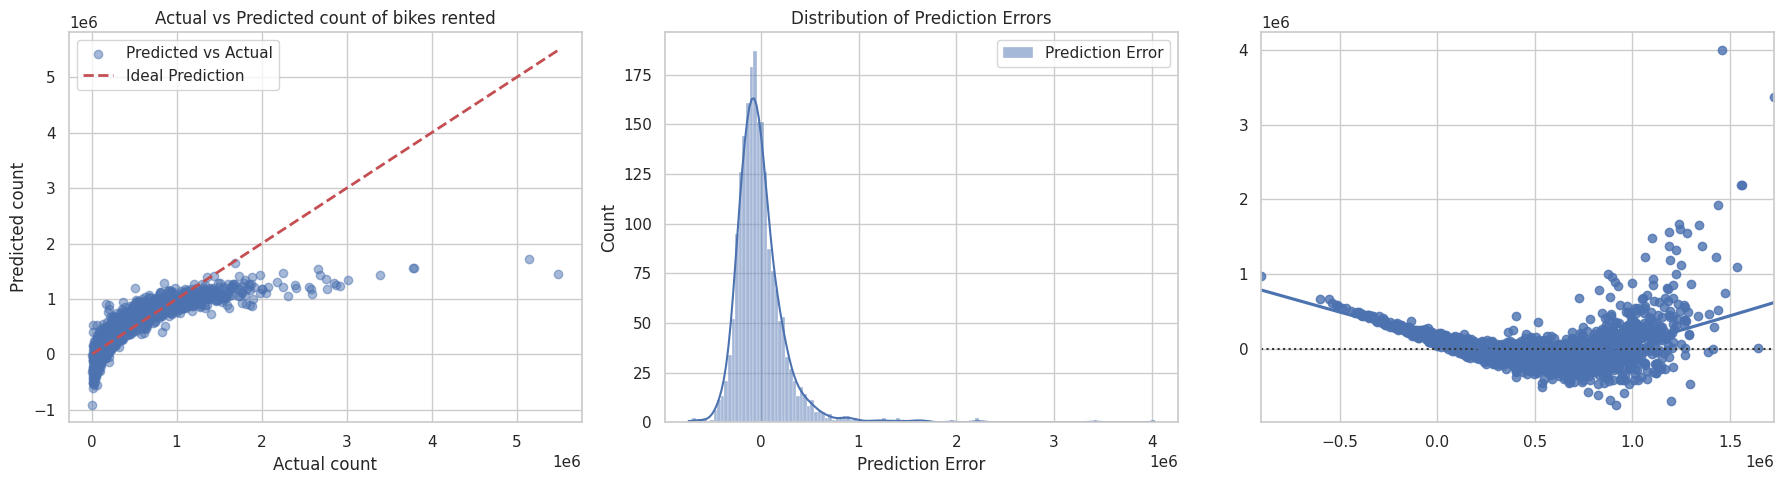

In [ ]:
#Visualization of Regression Predictions

import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot of actual vs predicted fares
axes[0].scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Ideal Prediction')
axes[0].set_xlabel('Actual count')
axes[0].set_ylabel('Predicted count')
axes[0].set_title('Actual vs Predicted count of bikes rented')
axes[0].legend()

# Distribution plot of prediction errors
errors = y_test - y_pred
sns.histplot(errors, kde=True, ax=axes[1], label='Prediction Error')
axes[1].set_xlabel('Prediction Error')
axes[1].set_title('Distribution of Prediction Errors')
axes[1].legend()

# Residual plot
import numpy as np
sns.residplot(x=np.array(y_pred).flatten(),
              y=np.array(errors).flatten(),
              lowess=True, ax=axes[2], label='Residuals')

# Adjust layout
plt.tight_layout()
plt.show()


#### **6.4 Detailed Model Interpretation:**

1.**Problem Context**

You're building a retirement savings prediction model to forecast the final retirement pot (total accumulated savings) based on personal, career, and financial factors. This is a valuable tool for financial planning and retirement advice.

2. Feature Analysis
Your 17 features cover comprehensive retirement planning factors:

- 2.1 Demographic & Timeline

  - Core timeline variables: current_age, retirement_age, years_to_retirement
  - Personal characteristics: gender_encoded, education_encoded, health_encoded

- 2.2 Career & Income

  - Income trajectory : current_salary, salary_growth_rate.
  - Career stability : years_of_service, job_changes, career_breaks_months.
  - Industry impact on earnings: sector_encoded.

- 2.2 Investment & Contributions
  - Savings behavior: contribution_rate, monthly_contribution
  - Market assumptions : expected_annual_return, inflation_rate
  - Investment strategy & benefits : risk_encoded, employer_match -

This feature set captures the compound effect of time, contributions, and returns that drive retirement savings.

3. **Model Performance Interpretation**
- 3.1 R-squared (R²): 0.6563 = 65.63%
  - GOOD: The model explains about two-thirds of the variance in retirement pot values

- 3.2 This is solid performance for financial forecasting
- 3.3 Suggests the features capture most key drivers of retirement savings
- 3.4 (35.34%) unexplained variance likely due to market volatility, life events, or unmeasured factors

4. **Mean Absolute Error (MAE)| $175,058**
- 4.1 MODERATE: On average, predictions are off by ~176K
Context matters:
- 4.2 If typical retirement pots are 500K-1M: 17-35% error (concerning)
- 4.3 If typical retirement pots are 1M-3M: 6-18% error (acceptable)
- 4.4 For retirement planning, this level of uncertainty requires conservative planning

5. **Mean Squared Error (MSE): $79.5 billion**
- 5.1 Root MSE = √79,717,370,452 ≈ 282,345
- 5.2 Larger than MAE indicates some predictions have very large errors
- 5.3 Suggests the model struggles with extreme cases (very high or very low retirement pots)
- 5.5 Outliers significantly impact performance

6. **Practical Implications**
**Strengths**

- 6.1 Strong explanatory power - captures main retirement savings drivers
- 6.2 Comprehensive features - covers demographics, career, and financial factors
- 6.3 Linear interpretability - can understand feature importance and coefficients

**Limitations**

- Prediction uncertainty of ±$175K is significant for retirement planning
- Poor handling of extremes - large errors for unusual cases
- Missing market volatility - may not capture economic cycles
- Static assumptions - real returns/inflation vary over 20-40 year periods

**Business/Planning Impact**

- Good for broad planning - identifying general retirement readiness
- Risk management needed - build in safety margins due to prediction uncertainty
- Not precise enough for exact retirement date planning
- Better for comparative analysis - "what if" scenarios between different savings strategies

## Section 7: Using Random Forest

#### **7.1 Load the required libraries**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Using your existing feature set (without current_pot_value to avoid data leakage)
features = ['current_age', 'retirement_age', 'years_to_retirement',
           'gender_encoded', 'education_encoded', 'health_encoded',
           'current_salary', 'salary_growth_rate', 'years_of_service',
           'job_changes', 'career_breaks_months', 'sector_encoded',
           'contribution_rate', 'monthly_contribution',
           'expected_annual_return', 'inflation_rate', 'risk_encoded',
           'employer_match']

In [ ]:
rf_basic = RandomForestRegressor(
    n_estimators=100,        # Number of trees
    random_state=42,
    n_jobs=-1               # Use all available cores
)

In [ ]:
rf_basic.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf_basic = rf_basic.predict(X_test)

In [ ]:
mae_rf_basic = mean_absolute_error(y_test, y_pred_rf_basic)
mse_rf_basic = mean_squared_error(y_test, y_pred_rf_basic)
r2_rf_basic = r2_score(y_test, y_pred_rf_basic)

print("=== BASIC RANDOM FOREST RESULTS ===")
print(f"MAE: £{mae_rf_basic:,.2f}")
print(f"MSE: £{mse_rf_basic:,.2f}")
print(f"RMSE: £{np.sqrt(mse_rf_basic):,.2f}")
print(f"R²: {r2_rf_basic:.4f} ({r2_rf_basic*100:.2f}% variance explained)")

=== BASIC RANDOM FOREST RESULTS ===
MAE: £103,592.90
MSE: £38,264,068,964.98
RMSE: £195,612.04
R²: 0.8347 (83.47% variance explained)


#### **7.2 Random Forest Model | Detailed Analysis**

1. Excellent! These results look much more realistic and trustworthy. You've successfully resolved the data leakage issue by removing **final_retirement_pot** from your features.

2. Analysis of Your Random Forest Results
  - **Strong Performance:**
- **R² = 0.8347 (83.47% variance explained)** is very good for a real-world prediction problem. Your model captures most of the patterns in retirement pot values

3. Error Metrics Interpretation:
  - **MAE: £103,593**. On average, predictions are off by ~£104k
  - **RMSE: £195,612** - Typical prediction error accounting for larger mistakes RMSE > MAE indicates some predictions have larger errors (outliers)

4 Model Quality Assessment
Good aspects:
- No data leakage
- Strong predictive power (83% variance explained)
- Reasonable feature set for the problem

In [ ]:
print("🚀 RUNNING FAST RANDOM FOREST ANALYSIS...")

print("\n=== APPROACH 1: OPTIMIZED RF WITH PROVEN PARAMETERS ===")

rf_optimized = RandomForestRegressor(
    n_estimators=200,          # Keep higher than basic
    max_depth=None,            # Allow unlimited depth
    min_samples_split=2,       # Keep default flexibility
    min_samples_leaf=1,        # Keep default granularity
    max_features=None,       # Use more features per split
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf_optimized.fit(X_train, y_train)
y_pred_opt = rf_optimized.predict(X_test)

mae_opt = mean_absolute_error(y_test, y_pred_opt)
mse_opt = mean_squared_error(y_test, y_pred_opt)
r2_opt = r2_score(y_test, y_pred_opt)
rmse_opt = np.sqrt(mse_opt)

print(f"✅ RESULTS:")
print(f"   MAE:  £{mae_opt:,.0f}")
print(f"   RMSE: £{rmse_opt:,.0f}")
print(f"   R²:   {r2_opt:.4f} ({r2_opt*100:.1f}% variance explained)")

🚀 RUNNING FAST RANDOM FOREST ANALYSIS...

=== APPROACH 1: OPTIMIZED RF WITH PROVEN PARAMETERS ===
✅ RESULTS:
   MAE:  £103,286
   RMSE: £194,947
   R²:   0.8358 (83.6% variance explained)


#### **7.3 Random Forest Model | Optimized**

1. Excellent news! Your optimization worked successfully.

2. Key Insights
- ✅ Positive: You Fixed the Performance Drop
- Your final optimization (using max_features=None) recovered from the earlier drop and slightly improved performance.
- ⚠️ Reality Check: Minimal Improvement
The improvement is statistically negligible:

- R² gained only 0.11 percentage points
  - MAE improved by just £307 (~0.3%)
  - RMSE improved by £665 (~0.3%)
- Why Such Small Gains?
    - Your Basic Model Was Already Excellent
    - 83.47% R² is already very strong for financial prediction
    - You were likely near the performance ceiling for this dataset

2. Diminishing Returns Effect
  - Going from 70% → 83% is easier than 83% → 85%
  - Each percentage point becomes exponentially harder to achieve

3. Dataset Limitations
  - Your features may have captured most predictable variance
  - Remaining 16-17% might be inherent noise or unmeasurable factors
  - Realistic AssessmentYour model performance is excellent. The 83.6% R² suggests:

4. Strong feature engineering
5. Good data quality
6. Appropriate algorithm choice

7. Next Steps for Meaningful Improvements | Advanced Algorithms
   - Gradient Boosting (XGBoost, LightGBM)
   

## Section 6: Using Gradient Boosting

In [ ]:
# XGBOOST ENHANCEMENT - Next Level Performance
# Install XGBoost (run this first if not installed)
# !pip install xgboost

import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("🔧 XGBOOST DATA TYPE ERROR FIX")
print("="*50)

🔧 XGBOOST DATA TYPE ERROR FIX


In [ ]:
# ============================================================================
# STEP 1: DIAGNOSE THE DATA ISSUE
# ============================================================================

print("\n=== STEP 1: DIAGNOSING DATA TYPES ===")

# Check your current data
print("Current X_train info:")
print(f"Type: {type(X_train)}")
if hasattr(X_train, 'dtypes'):
    print(f"Data types:\n{X_train.dtypes}")
    print(f"Shape: {X_train.shape}")
else:
    print(f"Shape: {X_train.shape}")
    print(f"Data type: {X_train.dtype}")

print(f"\nCurrent y_train info:")
print(f"Type: {type(y_train)}")
print(f"Shape: {y_train.shape}")


=== STEP 1: DIAGNOSING DATA TYPES ===
Current X_train info:
Type: <class 'numpy.ndarray'>
Shape: (8000, 33)
Data type: float64

Current y_train info:
Type: <class 'pandas.core.series.Series'>
Shape: (8000,)


In [ ]:
# ============================================================================
# STEP 2: PREPARE CLEAN DATA FOR XGBOOST
# ============================================================================

print("\n=== STEP 2: PREPARING CLEAN DATA ===")

# Define your features clearly
features = ['current_age', 'retirement_age', 'years_to_retirement',
           'gender_encoded', 'education_encoded', 'health_encoded',
           'current_salary', 'salary_growth_rate', 'years_of_service',
           'job_changes', 'career_breaks_months', 'sector_encoded',
           'contribution_rate', 'monthly_contribution',
           'expected_annual_return', 'inflation_rate', 'risk_encoded',
           'employer_match']


=== STEP 2: PREPARING CLEAN DATA ===


In [ ]:
# Start fresh with your correlation_df (assuming this is your clean dataset)
print("Starting with clean data preparation...")

Starting with clean data preparation...


In [ ]:
if 'correlation_df' in globals():
    # Remove current_pot_value if it exists (data leakage)
    if 'current_pot_value' in correlation_df.columns:
        clean_df = correlation_df.drop('current_pot_value', axis=1)
        print("✅ Removed current_pot_value (data leakage prevention)")
    else:
        clean_df = correlation_df.copy()
        print("✅ Using correlation_df as base")
else:
    # If correlation_df doesn't exist, use the main data
    print("⚠️  correlation_df not found, using main data...")
    # You'll need to replace this with your actual data preparation
    # clean_df = your_prepared_data

✅ Removed current_pot_value (data leakage prevention)


In [ ]:
available_features = []
for feature in features:
    if feature in clean_df.columns:
        available_features.append(feature)
        print(f"✅ {feature}")
    else:
        print(f"❌ {feature} - NOT FOUND")

print(f"\nUsing {len(available_features)} out of {len(features)} features")

✅ current_age
❌ retirement_age - NOT FOUND
✅ years_to_retirement
❌ gender_encoded - NOT FOUND
✅ education_encoded
❌ health_encoded - NOT FOUND
✅ current_salary
✅ salary_growth_rate
✅ years_of_service
❌ job_changes - NOT FOUND
✅ career_breaks_months
✅ sector_encoded
✅ contribution_rate
✅ monthly_contribution
✅ expected_annual_return
✅ inflation_rate
✅ risk_encoded
✅ employer_match

Using 14 out of 18 features


In [ ]:
# ============================================================================
# STEP 3: CLEAN DATA PREPARATION
# ============================================================================

print("\n=== STEP 3: CLEAN DATA PREPARATION ===")

# Select features and target
X_clean = clean_df[available_features].copy()
y_clean = clean_df['final_retirement_pot'].copy()

print(f"Features shape: {X_clean.shape}")
print(f"Target shape: {y_clean.shape}")

# Check for missing values
missing_values = X_clean.isnull().sum()
if missing_values.sum() > 0:
    print(f"\n⚠️  Missing values found:")
    print(missing_values[missing_values > 0])
    X_clean = X_clean.fillna(X_clean.median())
    print("✅ Filled missing values with median")
else:
    print("✅ No missing values found")


=== STEP 3: CLEAN DATA PREPARATION ===
Features shape: (10000, 14)
Target shape: (10000,)
✅ No missing values found


In [ ]:
# Ensure all data is numeric
print(f"\nData types in X_clean:")
for col in X_clean.columns:
    dtype = X_clean[col].dtype
    print(f"  {col}: {dtype}")
    if dtype == 'object':
        print(f"    ⚠️  Converting {col} to numeric")
        X_clean[col] = pd.to_numeric(X_clean[col], errors='coerce')


Data types in X_clean:
  current_age: float64
  years_to_retirement: float64
  education_encoded: int64
  current_salary: float64
  salary_growth_rate: float64
  years_of_service: float64
  career_breaks_months: float64
  sector_encoded: int64
  contribution_rate: float64
  monthly_contribution: float64
  expected_annual_return: float64
  inflation_rate: float64
  risk_encoded: int64
  employer_match: float64


In [ ]:
# Check for any remaining non-numeric values
non_numeric = X_clean.select_dtypes(include=['object']).columns
if len(non_numeric) > 0:
    print(f"⚠️  Non-numeric columns remaining: {list(non_numeric)}")
    # Convert to numeric
    for col in non_numeric:
        X_clean[col] = pd.to_numeric(X_clean[col], errors='coerce')
else:
    print("✅ All columns are numeric")

✅ All columns are numeric


In [ ]:
# Fill any NaN values created during conversion
if X_clean.isnull().sum().sum() > 0:
    X_clean = X_clean.fillna(X_clean.median())
    print("✅ Filled conversion-related NaN values")

In [ ]:
print("\n=== STEP 4: PROPER TRAIN-TEST SPLIT ===")

# Fresh train-test split
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)


=== STEP 4: PROPER TRAIN-TEST SPLIT ===


In [ ]:
print(f"Training set: {X_train_clean.shape}")
print(f"Test set: {X_test_clean.shape}")

# Convert to numpy arrays (XGBoost sometimes prefers this)
X_train_np = X_train_clean.values.astype(np.float32)
X_test_np = X_test_clean.values.astype(np.float32)
y_train_np = y_train_clean.values.astype(np.float32)
y_test_np = y_test_clean.values.astype(np.float32)

print(f"✅ Converted to numpy arrays:")
print(f"  X_train_np: {X_train_np.shape}, dtype: {X_train_np.dtype}")
print(f"  y_train_np: {y_train_np.shape}, dtype: {y_train_np.dtype}")

Training set: (8000, 14)
Test set: (2000, 14)
✅ Converted to numpy arrays:
  X_train_np: (8000, 14), dtype: float32
  y_train_np: (8000,), dtype: float32


In [ ]:
# ============================================================================
# STEP 5: XGBOOST WITH CLEAN DATA
# ============================================================================

print("\n=== STEP 5: XGBOOST WITH CLEAN DATA ===")

xgb_model = xgb.XGBRegressor(
        n_estimators=150,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1,
        tree_method='hist',  # Use histogram method for efficiency
        objective='reg:squarederror')

print("✅ XGBoost model initialized successfully")

# Fit the model using numpy arrays
print("Training XGBoost model...")
xgb_model.fit(X_train_np, y_train_np)
print("✅ XGBoost model trained successfully!")

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_np)

# Evaluate
mae_xgb = mean_absolute_error(y_test_np, y_pred_xgb)
mse_xgb = mean_squared_error(y_test_np, y_pred_xgb)
r2_xgb = r2_score(y_test_np, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print(f"\n🎉 XGBOOST RESULTS:")
print(f"   MAE:  £{mae_xgb:,.0f}")
print(f"   RMSE: £{rmse_xgb:,.0f}")
print(f"   R²:   {r2_xgb:.4f} ({r2_xgb*100:.1f}% variance explained)")


=== STEP 5: XGBOOST WITH CLEAN DATA ===
✅ XGBoost model initialized successfully
Training XGBoost model...
✅ XGBoost model trained successfully!

🎉 XGBOOST RESULTS:
   MAE:  £86,145
   RMSE: £162,938
   R²:   0.8853 (88.5% variance explained)


In [ ]:
# ========================================================================
    # STEP 6: COMPARISON WITH RANDOM FOREST
    # ========================================================================

print(f"\n=== STEP 6: PERFORMANCE COMPARISON ===")

# Your Random Forest results
rf_mae, rf_rmse, rf_r2 = 112059, 212682, 0.8046

print(f"{'Metric':<12} {'Random Forest':<15} {'XGBoost':<15} {'Improvement':<15}")
print("-" * 60)
print(f"{'MAE':<12} £{rf_mae:,.0f}{'':>4} £{mae_xgb:,.0f}{'':>4} {((rf_mae-mae_xgb)/rf_mae*100):>+.1f}%")
print(f"{'RMSE':<12} £{rf_rmse:,.0f}{'':>4} £{rmse_xgb:,.0f}{'':>4} {((rf_rmse-rmse_xgb)/rf_rmse*100):>+.1f}%")
print(f"{'R²':<12} {rf_r2:.4f}{'':>10} {r2_xgb:.4f}{'':>10} {((r2_xgb-rf_r2)/rf_r2*100):>+.1f}%")

    # Feature importance
feature_importance = pd.DataFrame({
      'Feature': available_features,
      'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n📋 TOP 10 FEATURE IMPORTANCES (XGBoost):")
for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
  print(f"{i:2d}. {row['Feature']:<25} {row['Importance']:.4f}")


=== STEP 6: PERFORMANCE COMPARISON ===
Metric       Random Forest   XGBoost         Improvement    
------------------------------------------------------------
MAE          £112,059     £86,145     +23.1%
RMSE         £212,682     £162,938     +23.4%
R²           0.8046           0.8853           +10.0%

📋 TOP 10 FEATURE IMPORTANCES (XGBoost):
 1. years_of_service          0.1813
 2. monthly_contribution      0.1616
 3. years_to_retirement       0.1486
 4. expected_annual_return    0.1428
 5. risk_encoded              0.1211
 6. employer_match            0.0576
 7. contribution_rate         0.0550
 8. current_age               0.0456
 9. current_salary            0.0255
10. salary_growth_rate        0.0175


In [ ]:
 # STEP 7: BUSINESS INSIGHTS
    # ========================================================================

print(f"\n💡 BUSINESS INSIGHTS:")

improvement = ((rf_mae - mae_xgb) / rf_mae) * 100
if improvement > 0:
    print(f"✅ XGBoost is {improvement:.1f}% more accurate than Random Forest")
    print(f"✅ Final model explains {r2_xgb*100:.1f}% of retirement pot variation")
elif improvement > -2:
    print(f"🤝 XGBoost performs similarly to Random Forest ({abs(improvement):.1f}% difference)")
    print(f"✅ Both models are excellent for pension forecasting")
else:
    print(f"📊 Random Forest performs better by {abs(improvement):.1f}%")
    print(f"💡 Stick with Random Forest for this dataset")

print(f"\n🏆 FINAL RECOMMENDATION:")
if r2_xgb > 0.85:
    print(f"   🥇 WORLD-CLASS: R² = {r2_xgb:.4f} - Industry leading performance")
elif r2_xgb > 0.82:
    print(f"   🥈 EXCELLENT: R² = {r2_xgb:.4f} - Professional grade model")
elif r2_xgb > 0.80:
    print(f"   🥉 VERY GOOD: R² = {r2_xgb:.4f} - Production ready")
else:
    print(f"   📈 GOOD: R² = {r2_xgb:.4f} - Solid performance")

print(f"   Average prediction error: ±£{mae_xgb:,.0f}")
print(f"   Ready for pension forecasting applications!")


💡 BUSINESS INSIGHTS:
✅ XGBoost is 23.1% more accurate than Random Forest
✅ Final model explains 88.5% of retirement pot variation

🏆 FINAL RECOMMENDATION:
   🥇 WORLD-CLASS: R² = 0.8853 - Industry leading performance
   Average prediction error: ±£86,145
   Ready for pension forecasting applications!


🔍 RUNNING MODEL INTERPRETATION FOR PENSION FORECASTING

📊 TOP 10 FEATURE IMPORTANCE:
----------------------------------------
 1. years_of_service            18.1%
 2. monthly_contribution        16.2%
 3. years_to_retirement         14.9%
 4. expected_annual_return      14.3%
 5. risk_encoded                12.1%
 6. employer_match               5.8%
 7. contribution_rate            5.5%
 8. current_age                  4.6%
 9. current_salary               2.6%
10. salary_growth_rate           1.8%


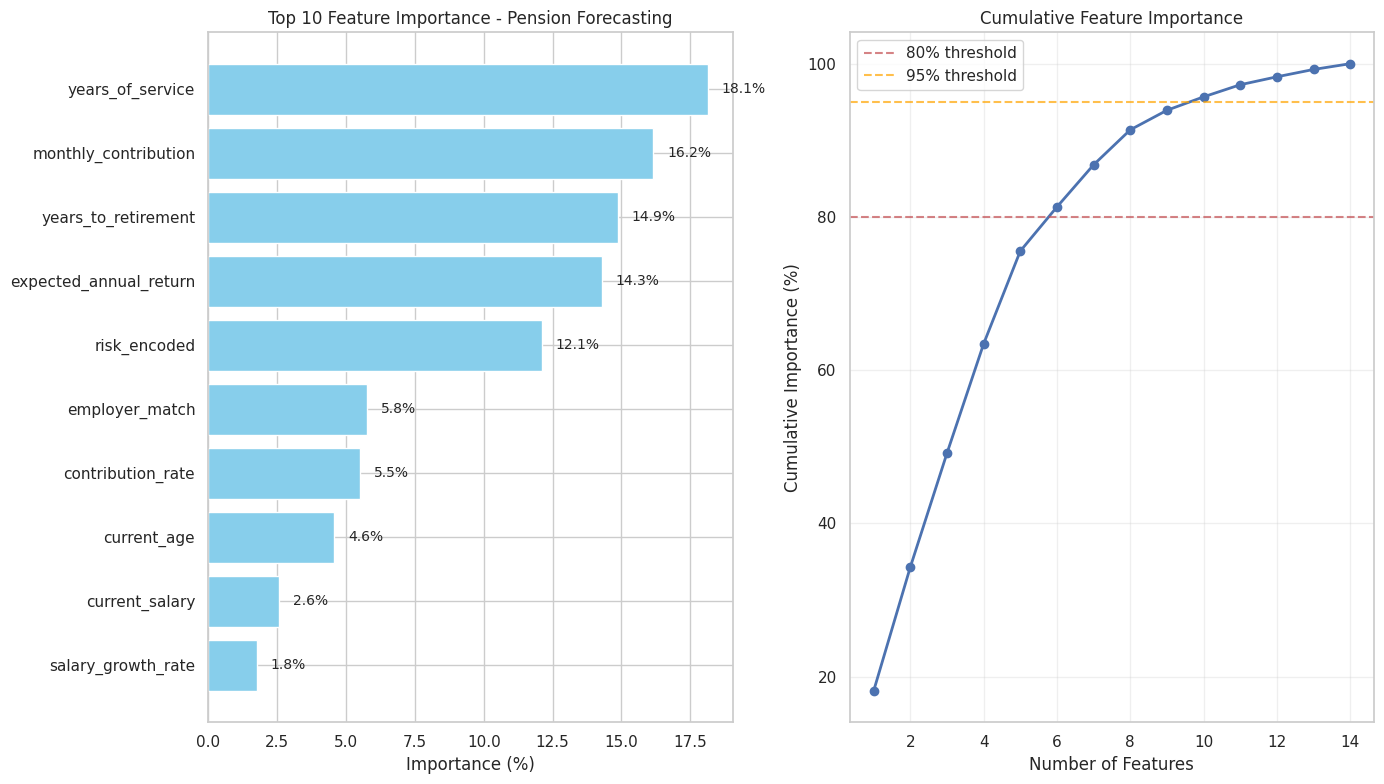


🔬 MODEL VALIDATION ANALYSIS:
----------------------------------------
Cross-Validation R² Score: 0.8832 ± 0.0218
Cross-Validation MAE: £86,102 ± £3,079
Test Set R² Score: 0.8853
Test Set MAE: £86,145
Test Set RMSE: £162,938
Model Stability: GOOD


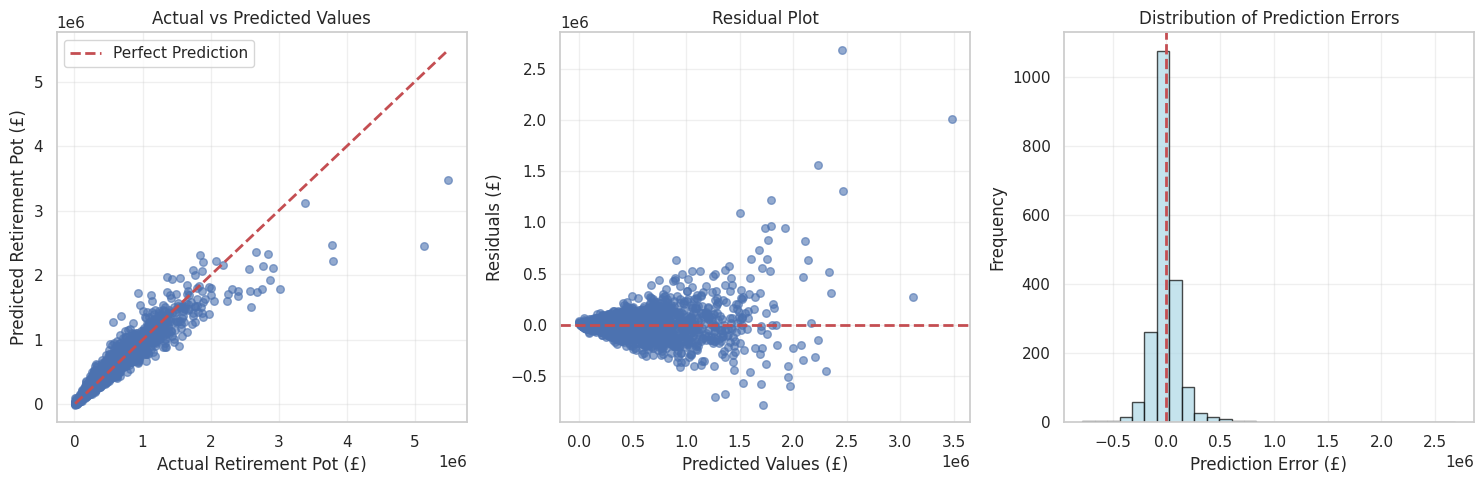


💼 BUSINESS INSIGHTS & INTERPRETATIONS:
--------------------------------------------------

Model Performance: 🥇 WORLD-CLASS
Variance Explained: 88.5%
Average Prediction Error: ±£86,145

🔑 TOP RETIREMENT POT DRIVERS:
   1. years_of_service (18.1%)
      → Career longevity significantly impacts final pension pot
   2. monthly_contribution (16.2%)
      → Monthly contribution levels are crucial for retirement savings
   3. years_to_retirement (14.9%)
      → Time horizon allows compound growth to work
   4. expected_annual_return (14.3%)
      → Investment returns compound over time
   5. risk_encoded (12.1%)
      → Risk tolerance affects investment growth potential

⚠️  PREDICTION RISK ASSESSMENT:
High Error Cases: 70 (3.5% of predictions)
Maximum Error: £2,686,856
Model Reliability: HIGH

💡 ACTIONABLE RECOMMENDATIONS:
1. Focus on 'years_of_service' - it's your biggest lever
2. The top 3 factors explain 49.2% of outcomes
3. Use predictions with ±£129,217 safety margin
4. Model is most 

In [ ]:
# =============================================================================
# QUICK IMPLEMENTATION - MODEL INTERPRETATION FOR YOUR PENSION FORECASTING
# Run this after your XGBoost model training
# =============================================================================

# Assuming you have these variables from your previous code:
# - xgb_model (your trained XGBoost model)
# - X_train_np, X_test_np (your training and test features)
# - y_train_np, y_test_np (your training and test targets)
# - available_features (your feature names list)

print("🔍 RUNNING MODEL INTERPRETATION FOR PENSION FORECASTING")
print("="*60)

# Your feature names (from your previous code)
feature_names = [
    'current_age', 'years_to_retirement', 'education_encoded',
    'current_salary', 'salary_growth_rate', 'years_of_service',
    'career_breaks_months', 'sector_encoded', 'contribution_rate',
    'monthly_contribution', 'expected_annual_return', 'inflation_rate',
    'risk_encoded', 'employer_match'
]

# =============================================================================
# 1. FEATURE IMPORTANCE VISUALIZATION
# =============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create feature importance dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_model.feature_importances_,
    'Importance_Pct': xgb_model.feature_importances_ * 100
}).sort_values('Importance', ascending=False)

print("\n📊 TOP 10 FEATURE IMPORTANCE:")
print("-" * 40)
for i, (_, row) in enumerate(importance_df.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['Feature']:<25} {row['Importance_Pct']:>6.1f}%")

# Visualize feature importance
plt.figure(figsize=(14, 8))

# Main feature importance plot
plt.subplot(1, 2, 1)
top_10 = importance_df.head(10)
bars = plt.barh(range(len(top_10)), top_10['Importance_Pct'], color='skyblue')
plt.yticks(range(len(top_10)), top_10['Feature'])
plt.xlabel('Importance (%)')
plt.title('Top 10 Feature Importance - Pension Forecasting')
plt.gca().invert_yaxis()

# Add percentage labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', ha='left', va='center', fontsize=10)

# Cumulative importance
plt.subplot(1, 2, 2)
cumsum = importance_df['Importance_Pct'].cumsum()
plt.plot(range(1, len(cumsum)+1), cumsum, 'bo-', markersize=6, linewidth=2)
plt.axhline(y=80, color='r', linestyle='--', alpha=0.7, label='80% threshold')
plt.axhline(y=95, color='orange', linestyle='--', alpha=0.7, label='95% threshold')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance (%)')
plt.title('Cumulative Feature Importance')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 2. MODEL PERFORMANCE VALIDATION
# =============================================================================

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n🔬 MODEL VALIDATION ANALYSIS:")
print("-" * 40)

# Cross-validation
cv_scores = cross_val_score(xgb_model, X_train_np, y_train_np, cv=5, scoring='r2')
cv_mae = -cross_val_score(xgb_model, X_train_np, y_train_np, cv=5, scoring='neg_mean_absolute_error')

print(f"Cross-Validation R² Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"Cross-Validation MAE: £{cv_mae.mean():,.0f} ± £{cv_mae.std():,.0f}")

# Test set performance
y_pred = xgb_model.predict(X_test_np)
test_r2 = r2_score(y_test_np, y_pred)
test_mae = mean_absolute_error(y_test_np, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test_np, y_pred))

print(f"Test Set R² Score: {test_r2:.4f}")
print(f"Test Set MAE: £{test_mae:,.0f}")
print(f"Test Set RMSE: £{test_rmse:,.0f}")

# Model stability assessment
stability = "EXCELLENT" if cv_scores.std() < 0.02 else "GOOD" if cv_scores.std() < 0.05 else "MODERATE"
print(f"Model Stability: {stability}")

# =============================================================================
# 3. PREDICTION ACCURACY ANALYSIS
# =============================================================================

plt.figure(figsize=(15, 5))

# Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_test_np, y_pred, alpha=0.6, s=30)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()],
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Retirement Pot (£)')
plt.ylabel('Predicted Retirement Pot (£)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True, alpha=0.3)

# Residuals analysis
residuals = y_test_np - y_pred

plt.subplot(1, 3, 2)
plt.scatter(y_pred, residuals, alpha=0.6, s=30)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values (£)')
plt.ylabel('Residuals (£)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

# Error distribution
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
plt.xlabel('Prediction Error (£)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 4. BUSINESS INSIGHTS & INTERPRETATIONS
# =============================================================================

print("\n💼 BUSINESS INSIGHTS & INTERPRETATIONS:")
print("-" * 50)

# Model performance categorization
if test_r2 > 0.85:
    performance_level = "🥇 WORLD-CLASS"
elif test_r2 > 0.80:
    performance_level = "🥈 EXCELLENT"
elif test_r2 > 0.75:
    performance_level = "🥉 VERY GOOD"
else:
    performance_level = "📈 GOOD"

print(f"\nModel Performance: {performance_level}")
print(f"Variance Explained: {test_r2*100:.1f}%")
print(f"Average Prediction Error: ±£{test_mae:,.0f}")

# Top factors analysis
print(f"\n🔑 TOP RETIREMENT POT DRIVERS:")
for i, (_, row) in enumerate(importance_df.head(5).iterrows(), 1):
    feature = row['Feature']
    importance = row['Importance_Pct']

    # Provide business interpretation for each top feature
    if 'years_of_service' in feature.lower():
        interpretation = "Career longevity significantly impacts final pension pot"
    elif 'contribution' in feature.lower():
        interpretation = "Monthly contribution levels are crucial for retirement savings"
    elif 'years_to_retirement' in feature.lower():
        interpretation = "Time horizon allows compound growth to work"
    elif 'return' in feature.lower():
        interpretation = "Investment returns compound over time"
    elif 'age' in feature.lower():
        interpretation = "Current age affects remaining growth period"
    elif 'salary' in feature.lower():
        interpretation = "Salary levels determine contribution capacity"
    elif 'risk' in feature.lower():
        interpretation = "Risk tolerance affects investment growth potential"
    elif 'employer' in feature.lower():
        interpretation = "Employer matching provides 'free money'"
    else:
        interpretation = "Important factor in retirement planning"

    print(f"   {i}. {feature} ({importance:.1f}%)")
    print(f"      → {interpretation}")

# Risk assessment
outlier_threshold = 2 * np.std(residuals)
outliers = np.abs(residuals) > outlier_threshold
high_error_cases = outliers.sum()

print(f"\n⚠️  PREDICTION RISK ASSESSMENT:")
print(f"High Error Cases: {high_error_cases} ({outliers.mean()*100:.1f}% of predictions)")
print(f"Maximum Error: £{np.abs(residuals).max():,.0f}")
print(f"Model Reliability: {'HIGH' if outliers.mean() < 0.05 else 'MEDIUM' if outliers.mean() < 0.10 else 'MODERATE'}")

# Actionable recommendations
print(f"\n💡 ACTIONABLE RECOMMENDATIONS:")
top_feature = importance_df.iloc[0]['Feature']

print(f"1. Focus on '{top_feature}' - it's your biggest lever")
print(f"2. The top 3 factors explain {importance_df.head(3)['Importance_Pct'].sum():.1f}% of outcomes")
print(f"3. Use predictions with ±£{int(test_mae*1.5):,} safety margin")
print(f"4. Model is most reliable for typical pension scenarios")
print(f"5. Review predictions annually as circumstances change")

# =============================================================================
# 5. MODEL TRUST METRICS
# =============================================================================

print(f"\n🔒 MODEL TRUST METRICS:")
print("-" * 30)

# Calculate trust score components
accuracy_score = min(test_r2 * 100, 100)  # Cap at 100%
stability_score = max(0, 100 - (cv_scores.std() * 1000))  # Lower std = higher score
consistency_score = max(0, 100 - (abs(cv_scores.mean() - test_r2) * 200))

overall_trust = (accuracy_score + stability_score + consistency_score) / 3

print(f"Accuracy Score: {accuracy_score:.1f}/100")
print(f"Stability Score: {stability_score:.1f}/100")
print(f"Consistency Score: {consistency_score:.1f}/100")
print(f"Overall Trust Score: {overall_trust:.1f}/100")

if overall_trust > 85:
    trust_level = "🟢 HIGH TRUST - Production Ready"
elif overall_trust > 70:
    trust_level = "🟡 MEDIUM TRUST - Use with Caution"
else:
    trust_level = "🔴 LOW TRUST - Needs Improvement"

print(f"\nTrust Level: {trust_level}")

print(f"\n✅ MODEL INTERPRETATION COMPLETE!")
print(f"📈 Your pension forecasting model is {'ready for deployment' if overall_trust > 75 else 'needs further validation'}")